# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [56]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [57]:
ROOTPATH = 'C:\\Users\\hegoi\\Datasets\\clasificador_paisajes'

In [58]:
os.listdir(ROOTPATH)

['seg_test', 'seg_train']

In [59]:
IMAGE_SIZE = (32,32)
TRAIN_PATH = ROOTPATH + "\\seg_train"
TEST_PATH = ROOTPATH + "\\seg_test"

In [60]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except:
                print("Error en lectura imagen", image_path)

    return np.array(X), np.array(y)


In [61]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [62]:
pd.Series(y_train).value_counts()

3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
Name: count, dtype: int64

In [63]:
pd.Series(y_test).value_counts()

2    553
3    525
4    510
5    501
1    474
0    437
Name: count, dtype: int64

In [64]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [66]:
y_train[:100]

array([0, 5, 5, 4, 3, 2, 3, 3, 0, 5, 0, 3, 5, 4, 2, 4, 4, 5, 1, 3, 2, 0,
       2, 2, 5, 1, 3, 5, 0, 3, 5, 5, 5, 2, 1, 2, 5, 4, 0, 1, 5, 1, 0, 4,
       0, 5, 1, 2, 3, 5, 4, 0, 2, 3, 5, 4, 0, 4, 1, 3, 3, 2, 4, 4, 2, 3,
       2, 1, 5, 3, 4, 1, 5, 1, 2, 1, 2, 1, 5, 3, 4, 5, 3, 1, 2, 3, 1, 4,
       4, 0, 3, 3, 4, 1, 5, 1, 5, 4, 1, 2])

glacier


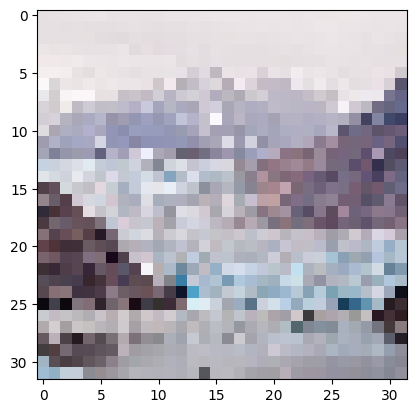

In [67]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index]);

In [68]:
X_train

array([[[[225, 225, 225],
         [221, 223, 222],
         [221, 223, 222],
         ...,
         [237, 237, 237],
         [238, 238, 238],
         [240, 240, 240]],

        [[230, 230, 230],
         [227, 227, 227],
         [232, 232, 232],
         ...,
         [244, 244, 244],
         [244, 244, 244],
         [246, 246, 246]],

        [[ 55,  55,  55],
         [223, 223, 223],
         [ 88,  87,  88],
         ...,
         [245, 245, 245],
         [246, 246, 246],
         [246, 246, 246]],

        ...,

        [[114, 112, 111],
         [ 97,  96,  94],
         [125, 123, 124],
         ...,
         [ 90,  89,  87],
         [ 88,  87,  85],
         [ 92,  91,  89]],

        [[153, 152, 150],
         [113, 112, 110],
         [123, 121, 122],
         ...,
         [ 83,  82,  79],
         [ 68,  67,  65],
         [ 80,  79,  77]],

        [[131, 130, 128],
         [133, 132, 130],
         [128, 126, 125],
         ...,
         [128, 127, 125],
        

In [69]:
X_train[0][0][0][0]

np.uint8(225)

In [70]:
print(X_train.min())
print(X_train.max())

0
255


In [71]:
X_train = X_train/255
X_test = X_test/255

In [72]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [73]:
X_train.shape

(14034, 32, 32, 3)

In [74]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])

C:\Users\hegoi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,190 (371.84 KB)

 Trainable params: 95,190 (371.84 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
64 * (3*3) * 3 + 64

1792

In [77]:
32 * (3*3) * 64 + 32

18464

In [78]:
6*6*32

1152

In [79]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [80]:
14034 * 0.8 /128 

87.7125

In [81]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3407 - loss: 1.5462 - val_accuracy: 0.5486 - val_loss: 1.2112
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5675 - loss: 1.1461 - val_accuracy: 0.6021 - val_loss: 1.0505
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6381 - loss: 0.9938 - val_accuracy: 0.6630 - val_loss: 0.9008
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6523 - loss: 0.9346 - val_accuracy: 0.6776 - val_loss: 0.8509
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6950 - loss: 0.8205 - val_accuracy: 0.7047 - val_loss: 0.7908
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7186 - loss: 0.7665 - val_accuracy: 0.7111 - val_loss: 0.7966
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7414 - loss: 0.7077 - val_accuracy: 0.7161 - val_loss: 0.7575
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7640 - loss: 0.6526 - val_accuracy: 0.7018 - v

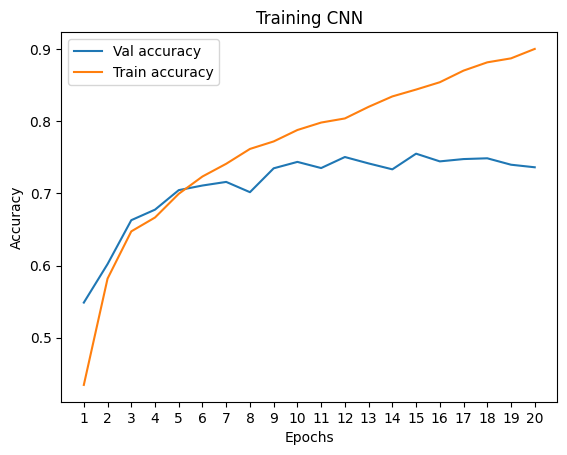

In [82]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,21))
plt.plot(df_hist['val_accuracy'], label="Val accuracy")
plt.plot(df_hist['accuracy'], label="Train accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.legend()

In [83]:
results = model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7283 - loss: 0.8866


In [84]:
y_pred = model.predict(X_test)
y_pred.round(2)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.  , 0.01, 0.04, 0.95, 0.01, 0.  ],
       [0.05, 0.02, 0.78, 0.04, 0.06, 0.04],
       [0.  , 0.  , 0.04, 0.23, 0.65, 0.07],
       ...,
       [0.02, 0.  , 0.6 , 0.18, 0.19, 0.  ],
       [0.  , 0.  , 0.01, 0.01, 0.98, 0.  ],
       [0.03, 0.44, 0.02, 0.  , 0.01, 0.5 ]], dtype=float32)

In [85]:
IMAGE_SIZE = (64,64)

In [86]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 64, 64, 3)
(3000, 64, 64, 3)
(14034,)
(3000,)


In [87]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_train = X_train/255
X_test = X_test/255

In [88]:
print(X_train.shape)

(14034, 64, 64, 3)


In [89]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])
model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history_2 = model_2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)

C:\Users\hegoi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 144ms/step - accuracy: 0.4530 - loss: 1.3610 - val_accuracy: 0.6281 - val_loss: 0.9584
Epoch 2/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step - accuracy: 0.6512 - loss: 0.9119 - val_accuracy: 0.6744 - val_loss: 0.8505
Epoch 3/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 143ms/step - accuracy: 0.7089 - loss: 0.7719 - val_accuracy: 0.7111 - val_loss: 0.7788
Epoch 4/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.7469 - loss: 0.6786 - val_accuracy: 0.7282 - val_loss: 0.7539
Epoch 5/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 141ms/step - accuracy: 0.7836 - loss: 0.5895 - val_accuracy: 0.7631 - val_loss: 0.6709
Epoch 6/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.8196 - loss: 0.4924 - val_accuracy: 0.7435 - val_loss: 0.7182
Epoch 7/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 26s 149ms/step - accuracy: 0.8372 - loss: 0.4385 - val_accuracy: 0.7706 - val_loss: 0.6774
Epoch 8/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step - accuracy: 0.8819 - loss: 0

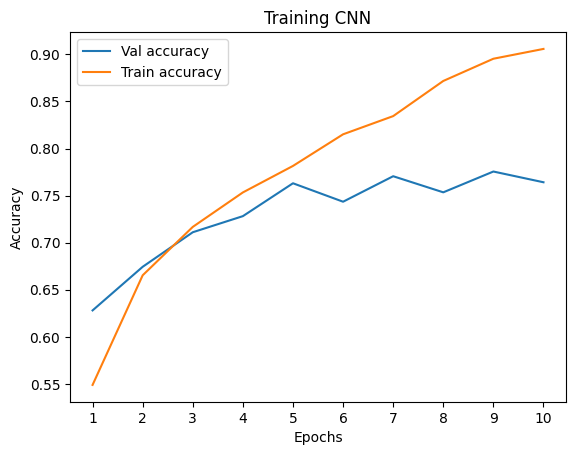

In [90]:
df_hist = pd.DataFrame(history_2.history, index=np.arange(1,11))
plt.plot(df_hist['val_accuracy'], label="Val accuracy")
plt.plot(df_hist['accuracy'], label="Train accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,11))
plt.legend()

In [91]:
results = model_2.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7690 - loss: 0.8014


In [92]:
y_pred = model_2.predict(X_test)
y_pred.round(2)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


array([[0.  , 0.  , 0.07, 0.93, 0.  , 0.  ],
       [0.  , 0.  , 0.87, 0.01, 0.01, 0.11],
       [0.06, 0.  , 0.01, 0.14, 0.78, 0.02],
       ...,
       [0.03, 0.  , 0.07, 0.85, 0.05, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.01, 0.73, 0.  , 0.  , 0.  , 0.25]], dtype=float32)

mountain


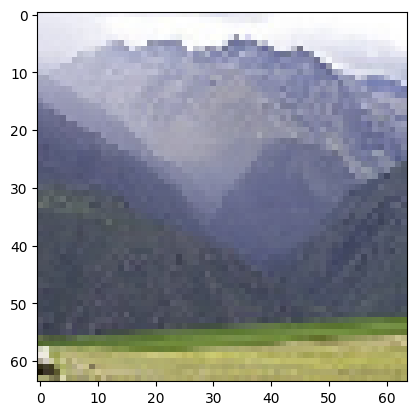

In [93]:
print(class_names[y_test[0]])
plt.imshow(X_test[0])

In [94]:
pred_labels = np.argmax(y_pred, axis=1)
print(pred_labels)
pred_names = [class_names[pred] for pred in pred_labels]
print(pred_names)

[3 2 4 ... 3 4 1]
['mountain', 'glacier', 'sea', 'buildings', 'street', 'mountain', 'glacier', 'sea', 'buildings', 'street', 'sea', 'buildings', 'forest', 'mountain', 'street', 'forest', 'glacier', 'forest', 'street', 'street', 'buildings', 'buildings', 'glacier', 'buildings', 'glacier', 'sea', 'glacier', 'glacier', 'street', 'glacier', 'glacier', 'mountain', 'forest', 'street', 'buildings', 'buildings', 'glacier', 'mountain', 'buildings', 'street', 'buildings', 'buildings', 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'buildings', 'buildings', 'glacier', 'glacier', 'forest', 'buildings', 'sea', 'buildings', 'street', 'glacier', 'forest', 'buildings', 'mountain', 'forest', 'forest', 'forest', 'buildings', 'street', 'glacier', 'glacier', 'mountain', 'mountain', 'forest', 'mountain', 'buildings', 'buildings', 'mountain', 'forest', 'forest', 'sea', 'street', 'sea', 'mountain', 'mountain', 'mountain', 'forest', 'mountain', 'buildings', 'street', 'street', 'glacier', 'mountain', 'st

<Axes: >

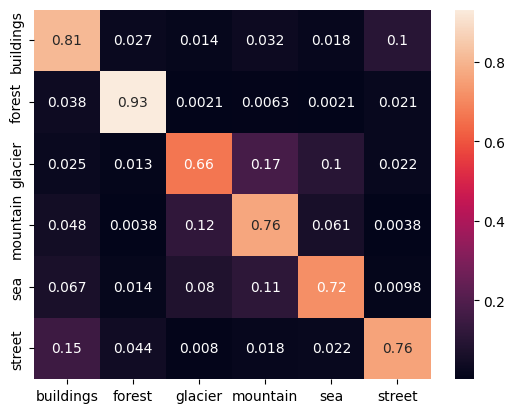

In [95]:
c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       437
           1       0.90      0.93      0.91       474
           2       0.76      0.66      0.71       553
           3       0.69      0.76      0.73       525
           4       0.77      0.72      0.74       510
           5       0.84      0.76      0.80       501

    accuracy                           0.77      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.77      0.77      0.77      3000



In [97]:
model_3 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(16, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])
model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history_3 = model_3.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)

C:\Users\hegoi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.4089 - loss: 1.4603 - val_accuracy: 0.5451 - val_loss: 1.1755
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.6079 - loss: 1.0428 - val_accuracy: 0.6106 - val_loss: 1.0389
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.6467 - loss: 0.9587 - val_accuracy: 0.6356 - val_loss: 0.9719
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.6753 - loss: 0.8762 - val_accuracy: 0.6160 - val_loss: 0.9916
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.6939 - loss: 0.8293 - val_accuracy: 0.6869 - val_loss: 0.8306
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.7225 - loss: 0.7501 - val_accuracy: 0.7211 - val_loss: 0.7726
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.7498 - loss: 0.6905 - val_accuracy: 0.7275 - val_loss: 0.7582
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.7666 - loss: 0.6587 - val_accuracy: 0.7257 - v

In [98]:
results = model_3.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7800 - loss: 0.6974
